<a href="https://colab.research.google.com/github/Basit2612/Deep-Learning-with-Pytorch/blob/main/02_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
n_samples = 1000
X, Y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(Y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of Y: {Y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of Y: [1 1 1 1 0]


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                       "X2": X[:, 1],
                       "label": Y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


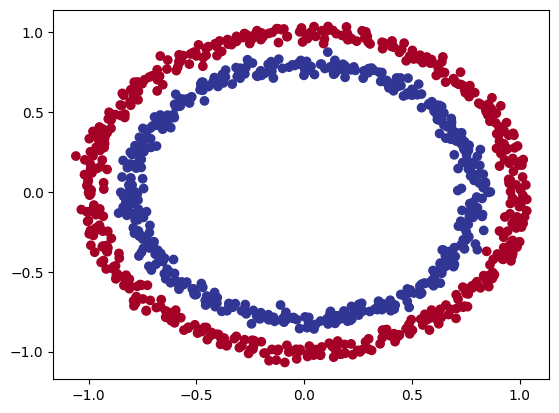

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=Y,
            cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
import torch
torch.__version__

'2.2.1+cu121'

In [ ]:
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

X[:5], Y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
X.dtype, Y.dtype

(torch.float32, torch.float32)

In [ ]:
torch.manual_seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
len(X_train), len(X_test), len(Y_test)

(800, 200, 200)

In [ ]:
n_samples

1000

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [ ]:
import torch
from torch import nn

In [ ]:
class Classifications(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

    # self.two_linear_models = nn.Sequential(
    #     nn.Linear(in_features=2, out_features=5),
    #     nn.Linear(in_features=5, out_features=1)
    # )

  def forward(self, x):
    return self.layer_2(self.layer_1(x))
    # return self.two.linear_models(x)

model_0_1 = Classifications().to(device)
model_0_1

Classifications(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
class Classification(nn.Module):
  def __init__(self):
    super().__init__()
    # self.linear_layers_1 = nn.Linear(in_features=2, out_features=5)
    # self.linear_layers_2 = nn.Linear(in_features=5, out_features=1)

    self.two_linear_models = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )

  def forward(self, x:torch.Tensor):
    # return self.linear_layer_2(self.linear_layers_1(x))
    return self.two_linear_models(x)

model_0_2 = Classification().to(device)
model_0_2

Classification(
  (two_linear_models): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
model_0_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
                      [ 0.4082,  0.1265],
                      [ 0.3591, -0.4310],
                      [-0.7000, -0.2732]])),
             ('0.bias', tensor([-0.5424,  0.5802,  0.2037,  0.2929,  0.2236])),
             ('1.weight',
              tensor([[-0.0078,  0.3500, -0.3178,  0.0282, -0.3052]])),
             ('1.bias', tensor([0.1379]))])

In [ ]:
device

'cpu'

In [ ]:
a = next(model_0_1.parameters())
a

Parameter containing:
tensor([[ 0.2976,  0.6313],
        [ 0.4087, -0.3091],
        [ 0.4082,  0.1265],
        [ 0.3591, -0.4310],
        [-0.7000, -0.2732]], requires_grad=True)

In [ ]:
b = next(model_0_1.parameters())
b

Parameter containing:
tensor([[ 0.2976,  0.6313],
        [ 0.4087, -0.3091],
        [ 0.4082,  0.1265],
        [ 0.3591, -0.4310],
        [-0.7000, -0.2732]], requires_grad=True)

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=2, out_features=5)
).to(device)

In [ ]:
model_0_2.state_dict()

OrderedDict([('two_linear_models.0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('two_linear_models.0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('two_linear_models.1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('two_linear_models.1.bias', tensor([-0.1213]))])

In [ ]:
with torch.inference_mode():
  untrained_preds = model_0_1(X_test.to(device))
print(f"Length of Predictions: {len(untrained_preds)}")
print(f"Length of Predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{Y_test[:10]}")

Length of Predictions: 200
Length of Predictions: 200, Shape: torch.Size([200, 1])

First 10 predictions:
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


For Regression yo might want MAE and MSE error

For Classification you might want binary cross entropy or categorical cross entropy

In [ ]:
loss_fn = nn.BCELoss()
loss_fn = nn.BCEWithLogitsLoss()

In [ ]:
nn.Sequential(
    nn.Sigmoid(),
    nn.BCELoss()
)
loss_fn = nn.BCEWithLogitsLoss()

# Both are equal

In [ ]:
optimizer = torch.optim.SGD(params = model_0_1.parameters(),
                            lr = 0.1)

In [ ]:
model_0_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
                      [ 0.4082,  0.1265],
                      [ 0.3591, -0.4310],
                      [-0.7000, -0.2732]])),
             ('0.bias', tensor([-0.5424,  0.5802,  0.2037,  0.2929,  0.2236])),
             ('1.weight',
              tensor([[-0.0078,  0.3500, -0.3178,  0.0282, -0.3052]])),
             ('1.bias', tensor([0.1379]))])

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [ ]:
! pip install scikit-learn

In [ ]:
import numpy as np
a = torch.tensor([0, 2, 1, 3])
b = torch.tensor([0, 1, 2, 3])
from sklearn.metrics import accuracy_score
score = accuracy_score(b, a)
score

0.5

In [ ]:
accuracy_fn(b, a)

50.0

Training Model

Forward Pass

Calculate the Loss

Optimizer Zero Grad

Back Propagation

Optimizer Step

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0_1(X_test.to(device))[:5]
y_logits

tensor([[0.0763],
        [0.1453],
        [0.0813],
        [0.0742],
        [0.3760]])

In [ ]:
Y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.5191],
        [0.5363],
        [0.5203],
        [0.5185],
        [0.5929]])

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epoch = 100

X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)

for epoch in range(epoch):
  model_0_1.train()

  #Forward Pass
  y_logits = model_0_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Calculte Accuracy
  from sklearn.metrics import accuracy_score
  # loss = loss_fn(torch.sigmoid(y_logits), Y_train)
  loss = loss_fn(y_logits, Y_train)
  accuracy = accuracy_fn(Y_train, y_pred)

  # Optimizer
  optimizer.zero_grad()

  # Loss Backward
  loss.backward()

  # OPtimizer Step
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    # Forward Pass
    test_logits = model_0_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # Calculate Test Loss
    test_loss = loss_fn(test_logits, Y_test)
    test_accuracy = accuracy_fn(Y_test, test_preds)

  # Prints whats Happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Loss {loss:.5f}, Train_accuracy: {accuracy:.2f}, Test_loss {test_loss:.5f}, Test_accuracy: {test_accuracy:.2f}")


Epoch: 0, Loss 0.70234, Train_accuracy: 57.38, Test_loss 0.70194, Test_accuracy: 57.00
Epoch: 10, Loss 0.69697, Train_accuracy: 52.75, Test_loss 0.69803, Test_accuracy: 54.00
Epoch: 20, Loss 0.69505, Train_accuracy: 51.62, Test_loss 0.69667, Test_accuracy: 51.00
Epoch: 30, Loss 0.69427, Train_accuracy: 51.12, Test_loss 0.69607, Test_accuracy: 51.00
Epoch: 40, Loss 0.69390, Train_accuracy: 50.38, Test_loss 0.69572, Test_accuracy: 49.50
Epoch: 50, Loss 0.69367, Train_accuracy: 50.50, Test_loss 0.69547, Test_accuracy: 49.00
Epoch: 60, Loss 0.69352, Train_accuracy: 50.38, Test_loss 0.69526, Test_accuracy: 49.00
Epoch: 70, Loss 0.69341, Train_accuracy: 50.50, Test_loss 0.69509, Test_accuracy: 49.00
Epoch: 80, Loss 0.69333, Train_accuracy: 50.38, Test_loss 0.69495, Test_accuracy: 49.00
Epoch: 90, Loss 0.69326, Train_accuracy: 50.25, Test_loss 0.69483, Test_accuracy: 48.50


In [ ]:
loss_fn

BCEWithLogitsLoss()

In [ ]:
loss_fn_without_Logits = nn.BCELoss()
loss_fn_without_Logits

BCELoss()

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


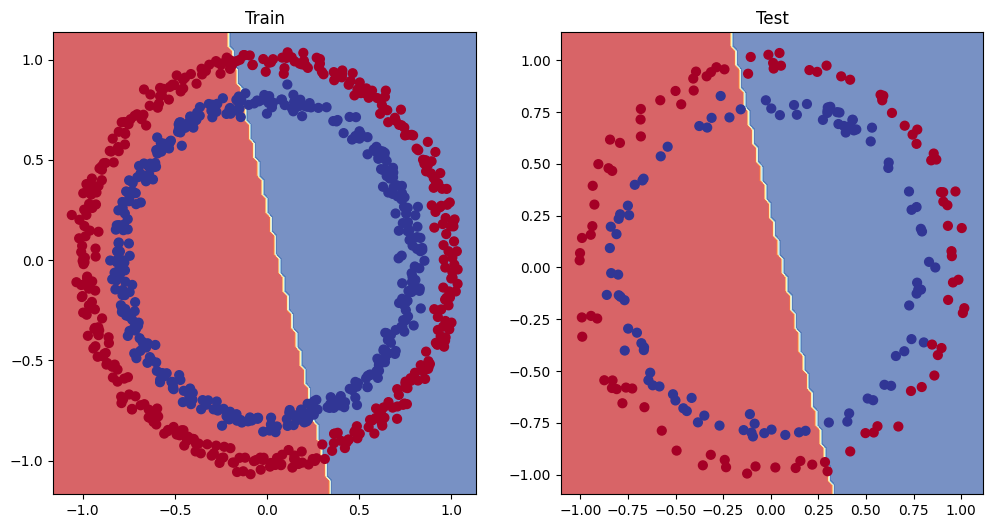

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0_1, X_train, Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0_1, X_test, Y_test)

In [ ]:
X_train[:5].shape, Y_train.shape

(torch.Size([5, 2]), torch.Size([800]))

In [ ]:
# Improving a Model
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features= 10) # in_features=2 because our X_train has 2 features(2 columns)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1) # out_features=1 beacause our Y_train has 1 label(1 column)

  def forward(self, x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [ ]:
# Loss Function
loss_fn_1 = nn.BCEWithLogitsLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)
for epoch in range(epochs):
  #Training Set
  model_1.train()

  #Forward Pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #Loss Function
  loss = loss_fn_1(y_logits, Y_train) # y_logits because we are using BCEwithLogitsLoss
  acc = accuracy_fn(Y_train, y_pred)

  # Optimzer Zero Gradient
  optimizer.zero_grad()

  # Backward Propagation
  loss.backward()

  # Optimizer Step
  optimizer.step()

  # Testing Set
  model_1.eval()
  with torch.inference_mode(): #As we are doing predictions we turn on torch inference mode
    # Forward Pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate Loss
    test_loss = loss_fn_1(test_logits, Y_test)
    test_accuracy = accuracy_fn(Y_test, test_pred)

  if epoch%100==0:
    print(f"Epoch: {epoch}, Loss: {loss:.5f}, Accuracy: {acc:.2f}, Test Loss {test_loss:.5f}, Test Accuracy: {test_accuracy:.2f}")

Epoch: 0, Loss: 0.69396, Accuracy: 50.88, Test Loss 0.69261, Test Accuracy: 51.00
Epoch: 100, Loss: 0.69305, Accuracy: 50.38, Test Loss 0.69379, Test Accuracy: 48.00
Epoch: 200, Loss: 0.69299, Accuracy: 51.12, Test Loss 0.69437, Test Accuracy: 46.00
Epoch: 300, Loss: 0.69298, Accuracy: 51.62, Test Loss 0.69458, Test Accuracy: 45.00
Epoch: 400, Loss: 0.69298, Accuracy: 51.12, Test Loss 0.69465, Test Accuracy: 46.00
Epoch: 500, Loss: 0.69298, Accuracy: 51.00, Test Loss 0.69467, Test Accuracy: 46.00
Epoch: 600, Loss: 0.69298, Accuracy: 51.00, Test Loss 0.69468, Test Accuracy: 46.00
Epoch: 700, Loss: 0.69298, Accuracy: 51.00, Test Loss 0.69468, Test Accuracy: 46.00
Epoch: 800, Loss: 0.69298, Accuracy: 51.00, Test Loss 0.69468, Test Accuracy: 46.00
Epoch: 900, Loss: 0.69298, Accuracy: 51.00, Test Loss 0.69468, Test Accuracy: 46.00


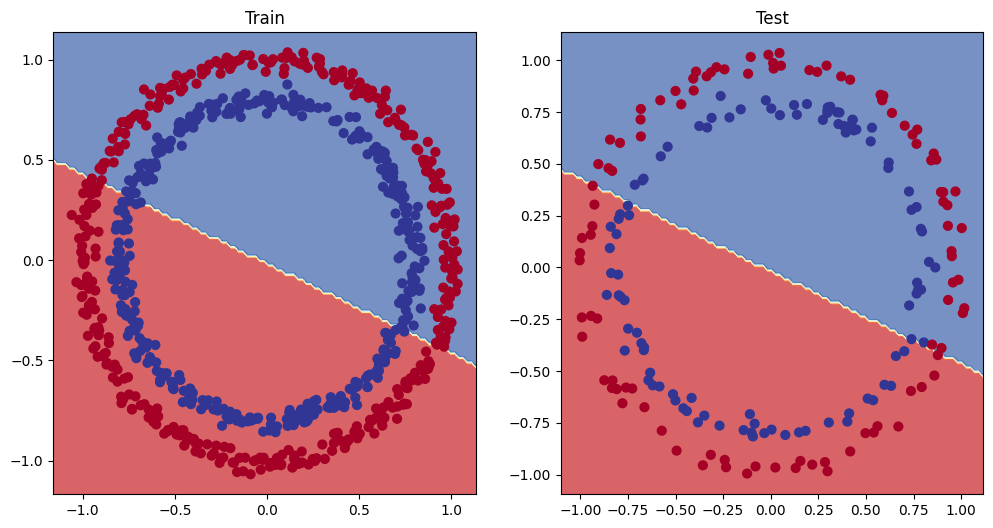

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, Y_test)

In [ ]:
weight = 0.7
bias = 0.3
X_regression = torch.arange(0,1,0.01).unsqueeze(dim=1)
y_regression = X_regression * weight + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
train_split = int(0.8*len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]
train_split, X_train_regression, y_train_regression, X_test_regression, y_test_regression

(80,
 tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900],
         [0.1000],
         [0.1100],
         [0.1200],
         [0.1300],
         [0.1400],
         [0.1500],
         [0.1600],
         [0.1700],
         [0.1800],
         [0.1900],
         [0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400],
         [0.2500],
         [0.2600],
         [0.2700],
         [0.2800],
         [0.2900],
         [0.3000],
         [0.3100],
         [0.3200],
         [0.3300],
         [0.3400],
         [0.3500],
         [0.3600],
         [0.3700],
         [0.3800],
         [0.3900],
         [0.4000],
         [0.4100],
         [0.4200],
         [0.4300],
         [0.4400],
         [0.4500],
         [0.4600],
         [0.4700],
         [0.4800],
         [0.4900],
         [0.5000],
         [0.5100],
       

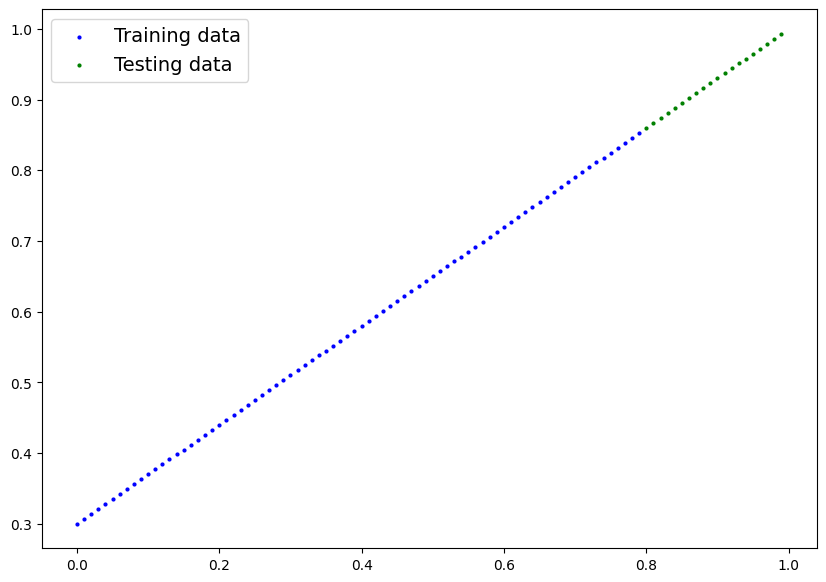

In [ ]:
plot_predictions(X_train_regression, y_train_regression, X_test_regression, y_test_regression)

In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn_2 = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr=0.01)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epoch = 1000
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)
for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(X_train_regression)
  loss = loss_fn_2(y_train_regression, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn_2(y_test_regression, test_pred)
    if epoch%100==0:
      print(f"Epoch: {epoch}, Loss: {loss}, Test Loss {test_loss}")

Epoch: 0, Loss: 0.7598584890365601, Test Loss 0.9110288619995117
Epoch: 100, Loss: 0.02857953868806362, Test Loss 0.0008127152686938643
Epoch: 200, Loss: 0.025325417518615723, Test Loss 0.002092066453769803
Epoch: 300, Loss: 0.021374788135290146, Test Loss 0.0030509470961987972
Epoch: 400, Loss: 0.019644945859909058, Test Loss 0.003407782409340143
Epoch: 500, Loss: 0.019402235746383667, Test Loss 0.0038725673221051693
Epoch: 600, Loss: 0.019032442942261696, Test Loss 0.003789058420807123
Epoch: 700, Loss: 0.01878291741013527, Test Loss 0.003813347313553095
Epoch: 800, Loss: 0.01839740015566349, Test Loss 0.0032872825395315886
Epoch: 900, Loss: 0.017980266362428665, Test Loss 0.00360372057184577


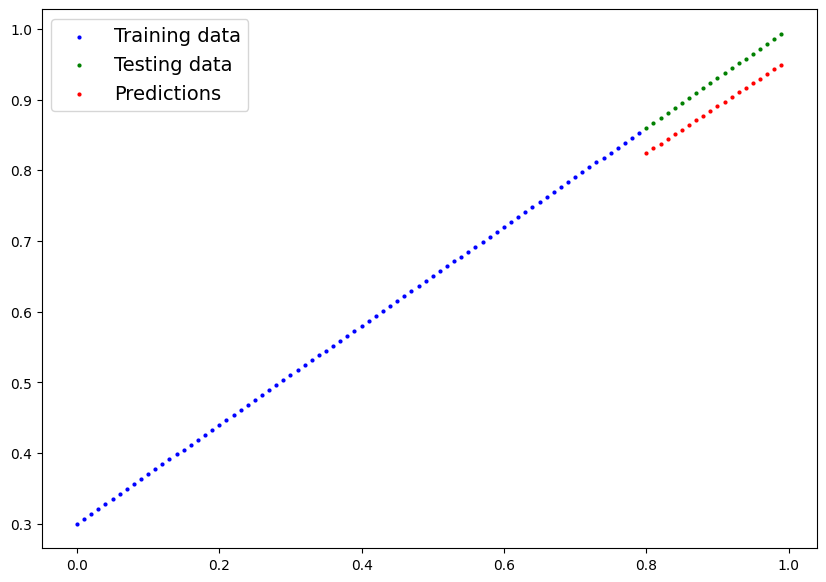

In [ ]:
model_2.eval()

with torch.inference_mode():
  y_preds=model_2(X_test_regression)

plot_predictions(X_train_regression, y_train_regression, X_test_regression, y_test_regression, y_preds)

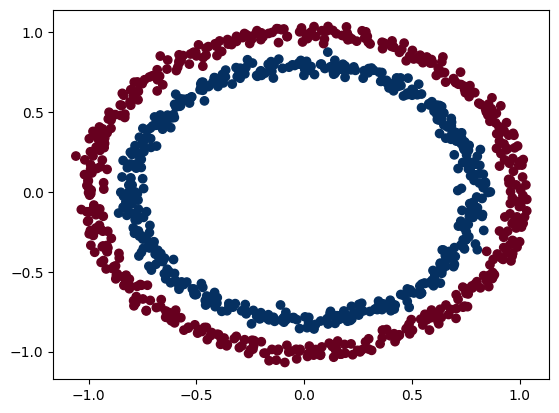

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)

In [ ]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn_3 = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr =0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

epochs = 1000
for epoch in range(epochs):
  model_3.train()

  y_logits=model_3(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn_3(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn_3(test_logits, y_test)
    test_accuracy = accuracy_fn(y_test, test_pred)

  if epoch%100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.2f} | Test Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.2f}")

Epoch: 0 | Loss: 0.6929 | Accuracy: 50.00 | Test Loss: 0.6932 | Test Accuracy: 50.00
Epoch: 100 | Loss: 0.6912 | Accuracy: 52.88 | Test Loss: 0.6910 | Test Accuracy: 52.50
Epoch: 200 | Loss: 0.6898 | Accuracy: 53.37 | Test Loss: 0.6894 | Test Accuracy: 55.00
Epoch: 300 | Loss: 0.6879 | Accuracy: 53.00 | Test Loss: 0.6872 | Test Accuracy: 56.00
Epoch: 400 | Loss: 0.6852 | Accuracy: 52.75 | Test Loss: 0.6841 | Test Accuracy: 56.50
Epoch: 500 | Loss: 0.6810 | Accuracy: 52.75 | Test Loss: 0.6794 | Test Accuracy: 56.50
Epoch: 600 | Loss: 0.6751 | Accuracy: 54.50 | Test Loss: 0.6729 | Test Accuracy: 56.00
Epoch: 700 | Loss: 0.6666 | Accuracy: 58.38 | Test Loss: 0.6632 | Test Accuracy: 59.00
Epoch: 800 | Loss: 0.6516 | Accuracy: 64.00 | Test Loss: 0.6476 | Test Accuracy: 67.50
Epoch: 900 | Loss: 0.6236 | Accuracy: 74.00 | Test Loss: 0.6215 | Test Accuracy: 79.00


In [ ]:
model_3.eval()

with torch.inference_mode():
  y_pred = torch.round(torch.sigmoid(model_3(x_test))).squeeze()

y_pred[:10],y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

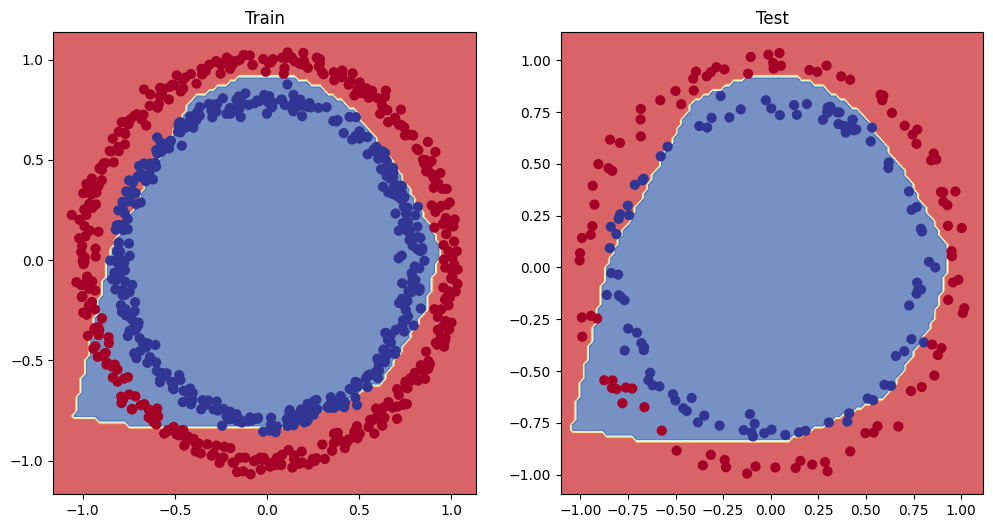

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, x_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, x_test, y_test)

In [ ]:
A = torch.arange(-10,9,1, dtype=torch.float32)

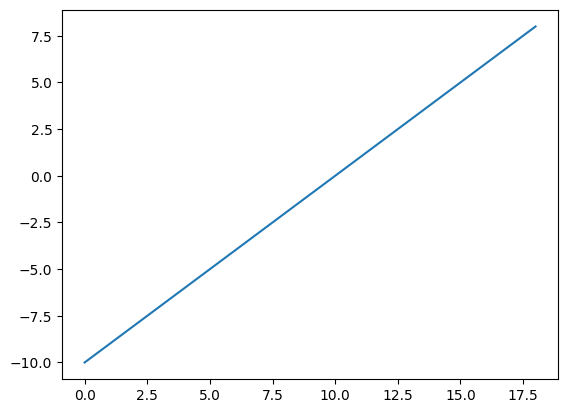

In [ ]:
plt.plot(A)

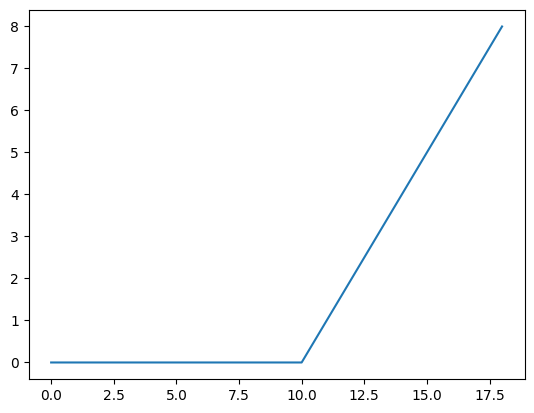

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor):
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8.])

In [ ]:
def sigmoid(x):
  return 1 / (1+torch.exp(-x))

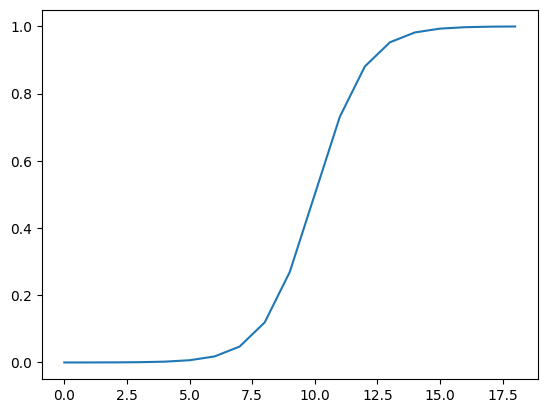

In [ ]:
plt.plot(sigmoid(A))

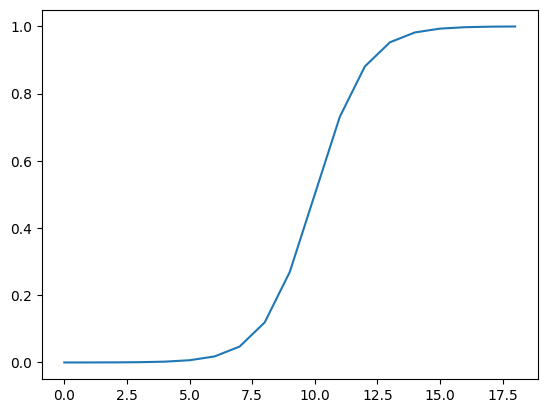

In [ ]:
plt.plot(torch.sigmoid(A))

# Putting things Together

## Multi-Class Classification

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


(800, 200)


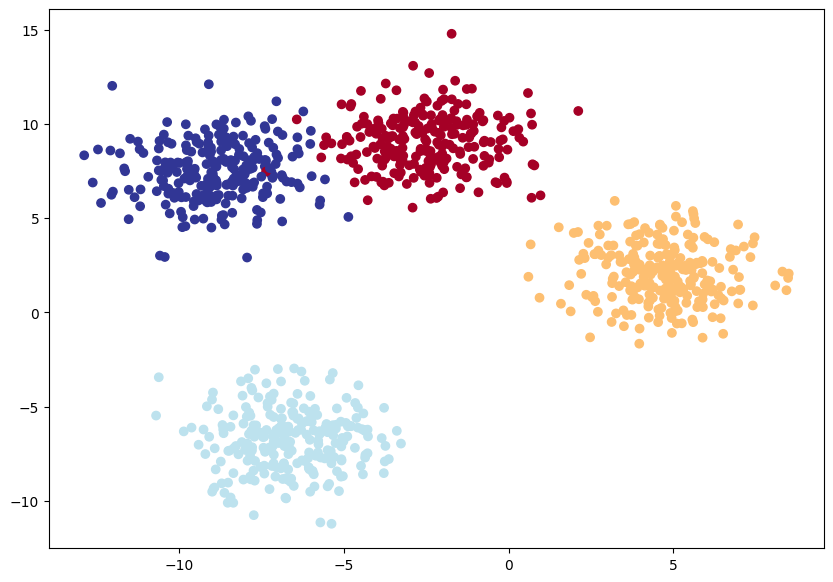

In [ ]:
# Hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

# Turn Data into Tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# Splitting the Datasets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state = RANDOM_SEED)

# PLot the Data
print(f"{len(X_blob_train), len(y_blob_test)}")
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [ ]:
len(X_blob), len(y_blob), X_blob.shape, y_blob.shape

(1000, 1000, torch.Size([1000, 2]), torch.Size([1000]))

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
torch.unique(y_blob_train), torch.unique(X_blob_train)

(tensor([0, 1, 2, 3]),
 tensor([-12.8932, -12.6338, -12.4747,  ...,  12.7091,  13.0945,  14.7934]))

In [ ]:
# Build a model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_blob = BlobModel(input_features=2, output_features=4, hidden_units=8)
model_blob.to(device)
model_blob

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
# Create Loss and optimizer

loss_4 = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_blob.parameters(), lr=0.1)

In [ ]:
X_blob_train, y_train_blob = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)
# model_blob(X_blob_train)

In [ ]:
next(model_blob.parameters())

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998]], requires_grad=True)

In [ ]:
model_blob.eval()
with torch.inference_mode():
  y_preds = model_blob(X_blob_test.to(device))

y_preds, y_blob_test[:5]

(tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
         [ 1.7168, -1.2270,  1.7367,  2.1010],
         [ 2.2400,  0.7714,  2.6020,  1.0107],
         [-0.7993, -0.3723, -0.9138, -0.5388],
         [-0.4332, -1.6117, -0.6891,  0.6852],
         [ 2.0878, -1.3728,  2.1248,  2.5052],
         [ 1.8310,  0.8851,  2.1674,  0.6006],
         [ 0.1412, -1.4742, -0.0360,  1.0373],
         [ 2.9426,  0.7047,  3.3670,  1.6184],
         [-0.0645, -1.5006, -0.2666,  0.8940],
         [ 0.4418, -1.3851,  0.3083,  1.2086],
         [-1.5169, -0.8383, -1.7723, -0.7571],
         [-0.2796, -1.6213, -0.5212,  0.8142],
         [ 0.0087, -1.6676, -0.2100,  1.0779],
         [-0.1146, -1.7781, -0.3619,  1.0633],
         [ 1.4046, -1.2270,  1.3925,  1.8533],
         [ 1.7991, -1.2295,  1.8271,  2.1682],
         [ 1.7553,  0.1992,  1.9850,  1.0572],
         [ 1.7293, -1.4932,  1.7121,  2.3114],
         [ 2.0059, -0.9975,  2.0886,  2.1575],
         [ 1.3878, -1.3971,  1.3495,  1.9682],
         [ 0.

In [ ]:
y_preds_prob = torch.softmax(y_preds, dim=1)
y_preds[:5], y_preds_prob[:5]

(tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
         [ 1.7168, -1.2270,  1.7367,  2.1010],
         [ 2.2400,  0.7714,  2.6020,  1.0107],
         [-0.7993, -0.3723, -0.9138, -0.5388],
         [-0.4332, -1.6117, -0.6891,  0.6852]]),
 tensor([[0.1872, 0.2918, 0.1495, 0.3715],
         [0.2824, 0.0149, 0.2881, 0.4147],
         [0.3380, 0.0778, 0.4854, 0.0989],
         [0.2118, 0.3246, 0.1889, 0.2748],
         [0.1945, 0.0598, 0.1506, 0.5951]]))

In [ ]:
torch.sum(y_preds_prob[0])

tensor(1.)

In [ ]:
torch.argmax(y_preds_prob, dim=1)

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)


epochs = 100

for epoch in range(epochs):
  model_blob.train()

  y_logits = model_blob(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_4(y_logits, y_blob_train)
  accuracy = accuracy_fn(y_blob_train, y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_blob.eval()
  with torch.inference_mode():
    test_logits = model_blob(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_4(test_logits, y_blob_test)
    test_accuracy = accuracy_fn(y_blob_test, test_preds)

    if epoch % 10 == 0:
      print(f"Epoch {epoch}, Loss {loss:.4f}, Accuracy {accuracy:.2f}, Test Loss {test_loss:.4f}, Test Accuracy {test_accuracy:.2f} ")


Epoch 0, Loss 1.0432, Accuracy 65.50, Test Loss 0.5786, Test Accuracy 95.50 
Epoch 10, Loss 0.1440, Accuracy 99.12, Test Loss 0.1304, Test Accuracy 99.00 
Epoch 20, Loss 0.0806, Accuracy 99.12, Test Loss 0.0722, Test Accuracy 99.50 
Epoch 30, Loss 0.0592, Accuracy 99.12, Test Loss 0.0513, Test Accuracy 99.50 
Epoch 40, Loss 0.0489, Accuracy 99.00, Test Loss 0.0410, Test Accuracy 99.50 
Epoch 50, Loss 0.0429, Accuracy 99.00, Test Loss 0.0349, Test Accuracy 99.50 
Epoch 60, Loss 0.0391, Accuracy 99.00, Test Loss 0.0308, Test Accuracy 99.50 
Epoch 70, Loss 0.0364, Accuracy 99.00, Test Loss 0.0280, Test Accuracy 99.50 
Epoch 80, Loss 0.0345, Accuracy 99.00, Test Loss 0.0259, Test Accuracy 99.50 
Epoch 90, Loss 0.0330, Accuracy 99.12, Test Loss 0.0242, Test Accuracy 99.50 


In [ ]:
len(y_blob_train), len(y_logits)

(800, 800)

In [ ]:
model_blob.eval()
with torch.inference_mode():
  y_logits=model_blob(X_blob_test)

y_logits[:5]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186]])

In [ ]:
y_preds = torch.softmax(y_logits, dim=1)
y_preds

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3697e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2266e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5435e-08, 4.7619e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
        [4.5039e-04, 5.4287e-13, 2.5532e-04, 9.9929e-01],
        [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
        [9.9860e-01, 3.9485e-04, 5.9937e-08, 1.0045e-03],
        [3.0436e-14, 6.8303e-20, 9.9965e-01, 3.5218e-04],
        [9.9843e-01, 1.3657e-03, 9.0767e-09, 2.0006e-04],
        [9.8678e-01, 8.8114e-05, 1.7221e-06, 1.3132e-02],
        [4.8105e-04, 9.9952e-01, 2.0896e-13, 4.7638e-11],
        [9.9724e-01, 2.7399e-03, 4.0747e-10, 2.4422e-05],
        [9.9956e-01, 2.8179e-04, 2.0969e-09, 1.6213e-04],
        [9.9964e-01, 3.2203e-04, 2.1464e-10, 4.0427e-05],
        [3.2729e-02, 1.0961e-08, 5.9538e-04, 9.6668e-01],
        [1.9381e-03, 4.2643e-11, 6.9133e-04, 9.9737e-01],
        [1.152

In [ ]:
y_preds_probs = torch.softmax(y_logits, dim=1)
y_preds_probs

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3697e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2266e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5435e-08, 4.7619e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
        [4.5039e-04, 5.4287e-13, 2.5532e-04, 9.9929e-01],
        [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
        [9.9860e-01, 3.9485e-04, 5.9937e-08, 1.0045e-03],
        [3.0436e-14, 6.8303e-20, 9.9965e-01, 3.5218e-04],
        [9.9843e-01, 1.3657e-03, 9.0767e-09, 2.0006e-04],
        [9.8678e-01, 8.8114e-05, 1.7221e-06, 1.3132e-02],
        [4.8105e-04, 9.9952e-01, 2.0896e-13, 4.7638e-11],
        [9.9724e-01, 2.7399e-03, 4.0747e-10, 2.4422e-05],
        [9.9956e-01, 2.8179e-04, 2.0969e-09, 1.6213e-04],
        [9.9964e-01, 3.2203e-04, 2.1464e-10, 4.0427e-05],
        [3.2729e-02, 1.0961e-08, 5.9538e-04, 9.6668e-01],
        [1.9381e-03, 4.2643e-11, 6.9133e-04, 9.9737e-01],
        [1.152

In [ ]:
y_preds = torch.argmax(y_preds_probs, dim=1)

In [ ]:
y_preds == y_blob_test

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

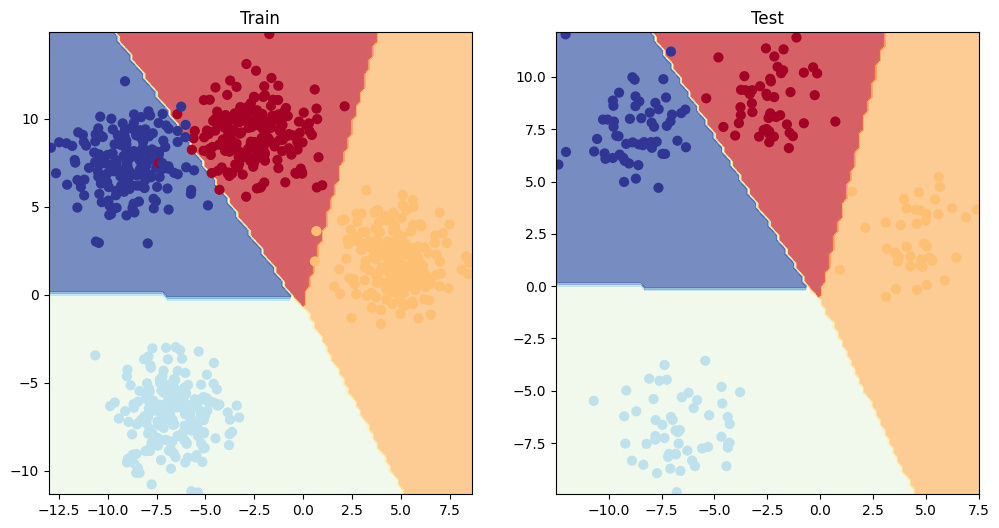

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_blob, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_blob, X_blob_test, y_blob_test)

# More Classification Model

In [ ]:
# Accuracy - for balanced dataset
# Precision - for imbalanced dataset
# Recall - for imbalanced dataset
# F1-score
# Confusion matrix
# Classification report

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 7.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from torchmetrics import Accuracy

torchmetrics_accuracy = Accuracy().to(device)
torchmetrics_accuracy(y_preds, y_blob_test)

TypeError: Accuracy.__new__() missing 1 required positional argument: 'task'